In [19]:
from sklearn.datasets import fetch_20newsgroups
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
import nltk
from nltk import ngrams

import re
import string

import re
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.lda_model

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Task 1
- Generate a Word Cloud Using the 20 Newsgroups Dataset
    - Load the 20 Newsgroups dataset with specific categories: 'sci.space', 'talk.politics.mideast', and 'rec.sport.baseball'.
    - Use the entire collection of documents to generate a word cloud that visualizes the most common words across these categories.
    - How does the word cloud differ when focusing on different categories? Try adjusting the categories parameter to observe changes.

In [10]:
# Download stopwords
nltk.download('stopwords')

# Load the dataset
categories = ['sci.space', 'talk.politics.mideast', 'rec.sport.baseball']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
documents = newsgroups.data

# Preprocessing function to clean the text
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    # Remove numbers
    text = re.sub(r'\b\d+\b', " ", text)  # Remove standalone numbers
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return " ".join(words)

# Apply preprocessing to all documents
cleaned_text = " ".join([preprocess_text(doc) for doc in documents])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mcevik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


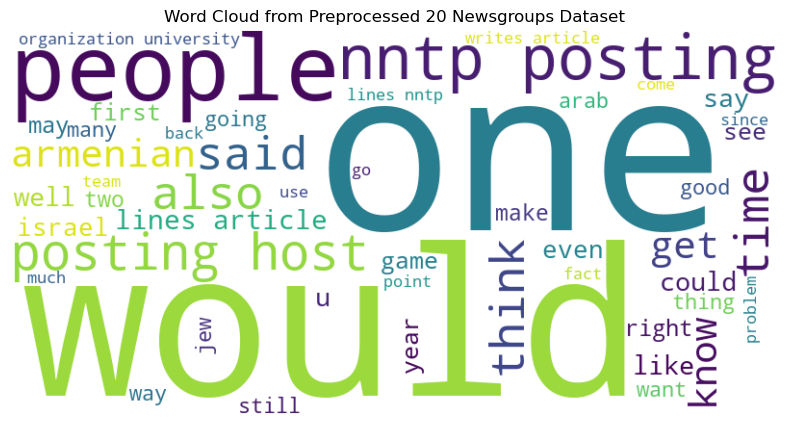

In [11]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, stopwords='english').generate(cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Preprocessed 20 Newsgroups Dataset')
plt.show()

# Task 2
- Plot a Word Frequency Histogram Using the 20 Newsgroups Dataset
    - Tokenize the combined text from the 20 Newsgroups dataset.
    - Count the frequency of each word and visualize the top 15 most frequent words using a bar chart.
    - Tokenize the text into bigrams and visualize the top 15 most frequent bigrams using a bar chart.

In [12]:
# Tokenize the combined text and count word frequencies
words = re.findall(r'\w+', cleaned_text.lower())
word_counts = Counter(words)

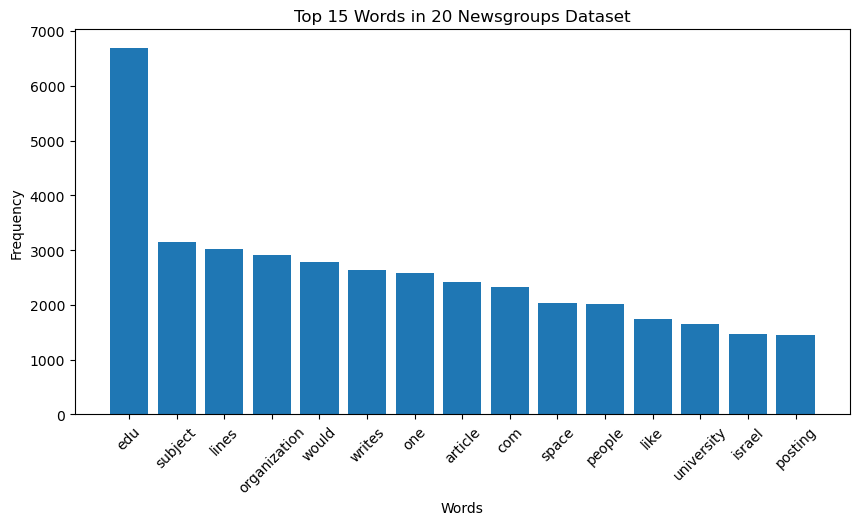

In [13]:
# Get the top 15 most frequent words
common_words = word_counts.most_common(15)
words, frequencies = zip(*common_words)

# Plot the word frequency histogram
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Words in 20 Newsgroups Dataset')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Generate bigrams
bigrams = list(ngrams(words, 2))

# Count bigram frequencies
bigram_counts = Counter(bigrams)

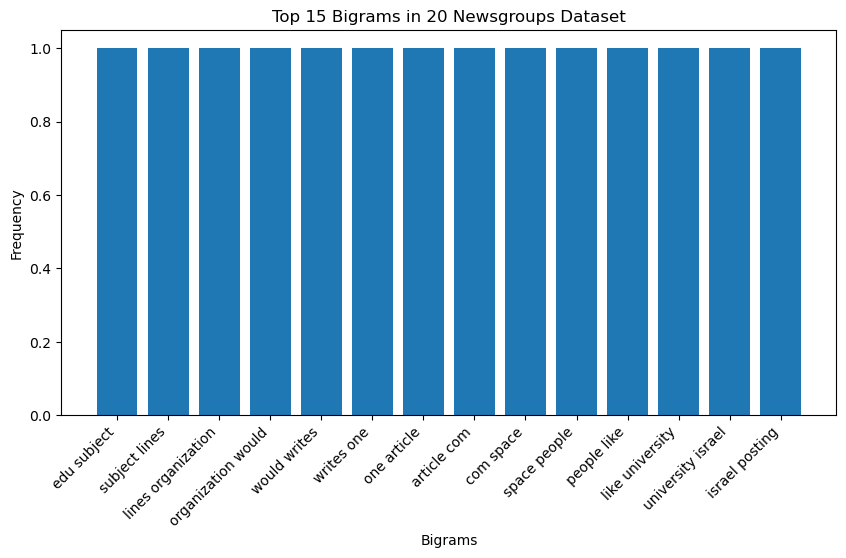

In [16]:
# Get the top 15 most frequent bigrams
common_bigrams = bigram_counts.most_common(15)
bi_grams, frequencies = zip(*[(f"{w1} {w2}", count) for (w1, w2), count in common_bigrams])

# Plot the bigram frequency histogram
plt.figure(figsize=(10, 5))
plt.bar(bi_grams, frequencies)
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 15 Bigrams in 20 Newsgroups Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()

# Task 3:
- Perform Sentiment Analysis on the 20 Newsgroups Dataset Using VADER
    - Analyze sentiment on a subset of documents using NLTK’s VADER sentiment analyzer and visualize the results.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mcevik/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


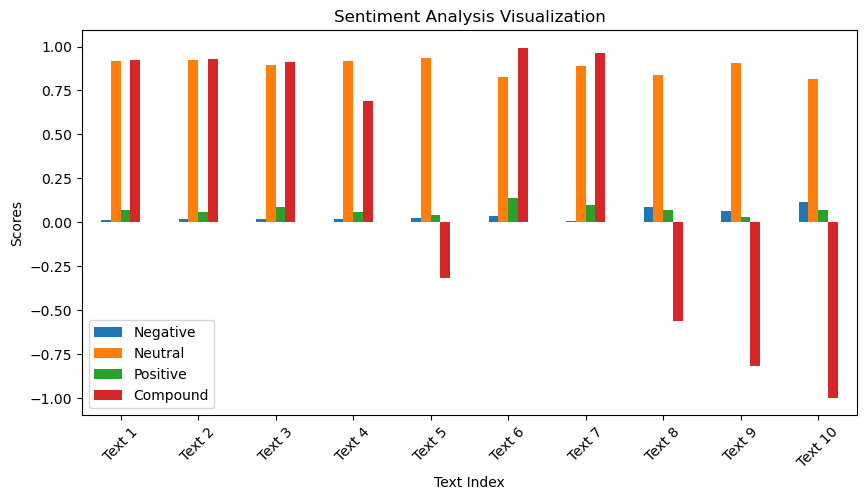

In [20]:
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment on a sample of 10 documents
sample_texts = documents[:10]
sentiments = [sid.polarity_scores(text) for text in sample_texts]

# Convert to DataFrame for visualization
df = pd.DataFrame(sentiments)
df['text'] = sample_texts

# Plot sentiment scores
df.plot(kind='bar', figsize=(10, 5), title='Sentiment Analysis Visualization', xlabel='Text Index', ylabel='Scores')
plt.xticks(ticks=range(len(df)), labels=[f"Text {i+1}" for i in range(len(df))], rotation=45)
plt.legend(['Negative', 'Neutral', 'Positive', 'Compound'])
plt.show()

In [21]:
sample_texts

['From: howard@sharps.astro.wisc.edu (Greg Howard)\nSubject: Re: Gamma Ray Bursters How energetic could they be?\nOrganization: University of Wisconsin - Astronomy Department\nLines: 40\nNNTP-Posting-Host: uwast.astro.wisc.edu\n\nIn article <1993Apr26.200406.1@vax1.mankato.msus.edu> belgarath@vax1.mankato.msus.edu writes:\n>In article <1rgvjsINNbhq@senator-bedfellow.MIT.EDU>, jfc@athena.mit.edu (John F Carr) writes:\n>> \n>> \n>> How much energy does a burster put out?  I know energy depends on\n>> distance, which is unknown.  An answer of the form _X_ ergs per\n>> megaparsec^2 is OK.\n>> \n>different spheres: R=.25pc(Oort Cloud Radius), R=22.5pc(at the edge of the\n>galaxy), R=183.5pc or the edge of the galactic corona, and lastly at a\n>R=8800Mpc.  \n>        For a radius of .25 pc, we found an L around 10^32 erg/sec.  Pretty\n>energetic for close by.  for the coronal model, we found around 10^43 erg/sec.\n>And lastly, for the cosmological model an L=10^53. That\'s what you\'d call\n